# Assignment 2
Seth Spire
### Understanding Uncertainty
### Due 9/12

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

iowa_liquor = pd.read_csv('./data/iowa.csv')
college_completion = pd.read_csv('./data/college_completion.csv')

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

> *I am going to define the most profitable item as the one which has the highest total net profit (sum of retail-cost for all sales of that item). Rather than going a direction of which is the most profitable on a per item basis, I would lean towards looking at the total money brought in for the the item as this shows which is bringing in the most profit combined. A item with a large profit per item but low sales may less valuable than one with a lower profit per item but a very high number of sales.*

<Axes: xlabel='Net Profit', ylabel='Item Description'>

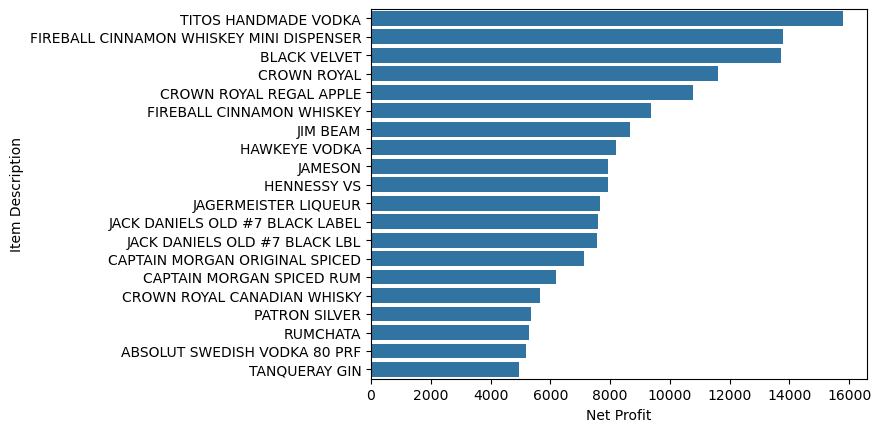

In [2]:
iowa_liquor['Net Profit'] = iowa_liquor['State Bottle Retail'] - iowa_liquor['State Bottle Cost']
item_profit = (
    iowa_liquor[['Item Description', 'Net Profit']]
        .groupby('Item Description')
        .sum()
        .sort_values(by='Net Profit', ascending=False)
)

top_item_profit = item_profit[:20]
sns.barplot(top_item_profit['Net Profit'], orient='h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
    >*Trying to subtract those 2 vectors gives a ValueError because they are of shapes (3,) and (2,) which is different and thus cannot be broadcast together*

- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
    >*This works as they are reshaped such that we are broadcasting vectors of shapes (3,1) and (1,2) and get a result of shape (3,2) as both initial vectors can scale up to that shape*

- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
    >*This also works as they are reshaped such that we are broadcasting vectors of shapes (1,3) and (2,1) and get a result of shape (2,3) as both initial vectors can scale up to that shape*

- Write two double for-loops to replicate the results of the previous two answers. 
    >*complete*

- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$
    >*The reshape function in this instance is taking in 2 arguements for number of rows and number of columns (though it can be extended for more dimensions). If a value is `-1` then numpy figures out what that value should be to make it work. So `x.reshape(1,-1)` turns x (which is a flat array like a list) into a 2d vector with 1 row, and it has 3 columns as this is the required number to x to have 1 row. And `x.reshape(-1,1)` turns x into a 2d vector with 1 column, and it has 3 rows as this is the required number for x to have 1 column.*

In [3]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

x-y


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [4]:

x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [5]:

x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

In [6]:
result1 = np.zeros((len(x), len(y)), dtype=int)
for i in range(len(x)):
    for j in range(len(y)):
        result1[i,j] = x[i] - y[j]

result1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [7]:

result2 = np.zeros((len(y), len(x)), dtype=int)
for i in range(len(y)):
    for j in range(len(x)):
        result2[i,j] = x[j] - y[i]

result2

array([[-1,  1,  3],
       [-4, -2,  0]])

In [8]:
x.shape
x.reshape((-1,1))

array([[1],
       [3],
       [5]])

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
    >*complete below: is 0 less than three and 1 greater than or equal to three*

- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
    >*$\mathbb{I}\{ x \le z \}$ and $\mathbb{I}\{ x > z \}$ are inverses. For all values of $x$ for a given $z$ (or vice versa), if one of them returns 1 than the other will return 0. Doing the "$1-$" with $ 1- \mathbb{I}\{ x \le z \}$ returns the inverse of that indicator function as indicators functions can only return 0 or 1. Thus this is effectively taking the inverse of an inverse which yields the original indicator.*

- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
    >*complete below*

- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases
    >*As the sample size $N$ increases, the ECDF gets smoother. This is happening for 2 main reasons. First, when $N=3$ the graph has 3 "steps" up which results in a very blocky graph, so as $N$ increases, the ECDF gets less blocky and much more smooth. Also, as $N$ increases, the values of N become a better representation of the normal distribution, so it converges towards the true ECDF of the normal distribution*

<Axes: >

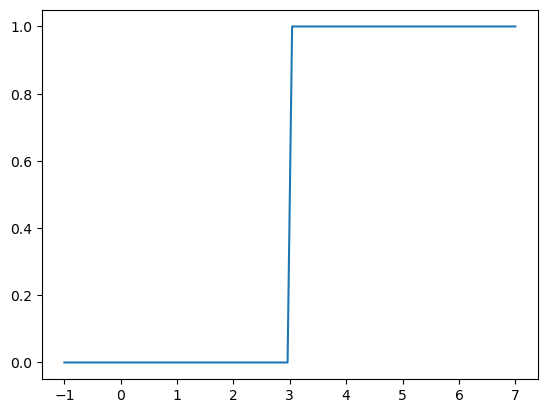

In [9]:
import matplotlib.pyplot as plt

x = 3
z = np.linspace(-1, 7, 100) # Create list of possible values for z, centered at x=3

indicator = z >= x

sns.lineplot(x=z,y=indicator)

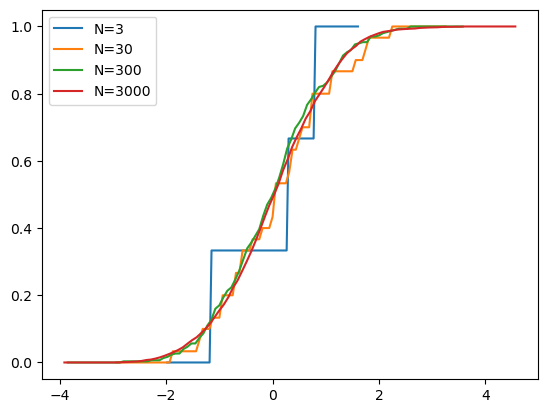

In [10]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N) # generates a normal distribution of size=N, mean=0, std=1
    grid = np.linspace(X.min()-X.std(), X.max()+X.std(), 100) # Create a grid of 100 equally-spaced values that splans lsightly more than range of X
    ecdf = 0*grid.copy() # Create a space for values
    
    def indicate(x,grid):
        return x <= grid # returns vector of 0s and 1s that indicate if x is less than each value in grid

    for i in range(len(X)):
        F_i = indicate(X[i],grid) # gets results of indicate function across all values in grid for this x value
        ecdf += F_i # adds result vector from indicate function to ecdf vector (for each value in ecdf, add the matching value in F_i)

    ecdf = ecdf/len(X) # divide all values in ecdf by size of X to normalize values to being between 0 and 1
    sns.lineplot(x=grid, y=ecdf, label=f'N={N}')


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

250.0
(375.0, 1375.0)
750.0
(20, 750.0, 750.0, 1000.0, 6000)
Bottle Volume (ml)
False    112020
True      47884
Name: count, dtype: int64

My 5 number summary:
    (True Min:    20)
Whisker Min: 375.0
Q1:          750.0
Median:      750.0
Q3:          1000.0
Whisker Max: 1375.0
    (True Max:    6000)

.describe:
count    159904.000000
mean        869.592737
std         513.812818
min          20.000000
25%         750.000000
50%         750.000000
75%        1000.000000
max        6000.000000
Name: Bottle Volume (ml), dtype: float64


<Axes: xlabel='Bottle Volume (ml)'>

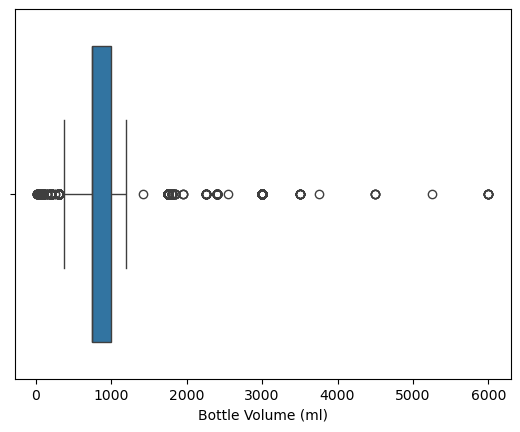

In [25]:
def quantile(data, q) -> float:
    data_sorted = sorted(data) # sort data

    pos = (len(data) - 1) * q
    lower = int(pos) # round down to first index below quantile
    upper = min(lower + 1, len(data) - 1) # round up to first index above quantile
    weight = pos - lower # weight between lower and upper

    return data_sorted[lower]*(1 - weight) + data_sorted[upper]*weight

def iqr(data) -> tuple:
    # NOTE: I separated the iqr function and whiskers function as they seem more usable separately
    return quantile(data, .75) - quantile(data, .25)

def whiskers(data) -> tuple:
    iqr_value = iqr(data)
    whisker_length = 1.5*iqr_value
    return (quantile(data, .25) - whisker_length, quantile(data, .75) + whisker_length)

def five_num_summary(data, to_print=False) -> tuple:
    min_value = quantile(data, 0)
    q1 = quantile(data, .25)
    max_value = quantile(data, 1)
    q3 = quantile(data, .75)
    median = quantile(data, .5)
    whisker_min, whisker_max = whiskers(data)

    if to_print:
        print(f'    (True Min:    {min_value})')
        print(f'Whisker Min: {whisker_min}')
        print(f'Q1:          {q1}')
        print(f'Median:      {median}')
        print(f'Q3:          {q3}')
        print(f'Whisker Max: {whisker_max}')
        print(f'    (True Max:    {max_value})')

    return min_value, q1, median, q3, max_value

def outliers(data) -> pd.Series:
    whiskers_values = whiskers(data)
    return (data < whiskers_values[0]) | (data > whiskers_values[1])



bottles_sold = iowa_liquor['Bottle Volume (ml)']
print(iqr(bottles_sold))
print(whiskers(bottles_sold))
print(quantile(bottles_sold, .5))
print(five_num_summary(bottles_sold))
print(outliers(bottles_sold).value_counts())

print("\nMy 5 number summary:")
five_num_summary(bottles_sold, to_print=True)
print("\n.describe:")
print(bottles_sold.describe())
sns.boxplot(bottles_sold, orient='h')

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

In [12]:
def uniform_kernel(data, grid, bandwidth):
    u = (data - grid) / bandwidth
    return (1/bandwidth) * (1/2) * (np.abs(u) <= 1)

def gaussian_kernel(data, grid, bandwidth):
    u = (data - grid) / bandwidth
    return (1/bandwidth) * (1/np.sqrt(2*np.pi)) * np.exp(-(u**2)/2)

def triangular_kernel(data, grid, bandwidth):
    u = (data - grid) / bandwidth
    return (1/bandwidth) * (1-np.abs(u)) * (np.abs(u) <= 1)

def epanechnikov_kernel(data, grid, bandwidth):
    u = (data - grid) / bandwidth
    return (1/bandwidth) * (3/4) * (1 - u**2) * (np.abs(u) <= 1)

def kde(data, h):
    grid = np.linspace(data.min()-data.std(), data.max()+data.std(), int(len(data)/4)) # Create a grid

    kernel_functions = [uniform_kernel, gaussian_kernel, triangular_kernel, epanechnikov_kernel]

    for k_func in kernel_functions:
        # with broadcasting to be way faster
        values = k_func(data.reshape(-1, 1), grid.reshape(1, -1), h)
        kde_vals = values.mean(axis=0)
        sns.lineplot(x=grid, y=kde_vals, label=k_func.__name__)
    
    plt.show()

def plug_in_bandwidth(data):
    iqr = np.quantile(data, .75) - np.quantile(data, .25)
    return 0.9 * min(np.std(data), iqr/1.34) * len(data) **(-0.2)



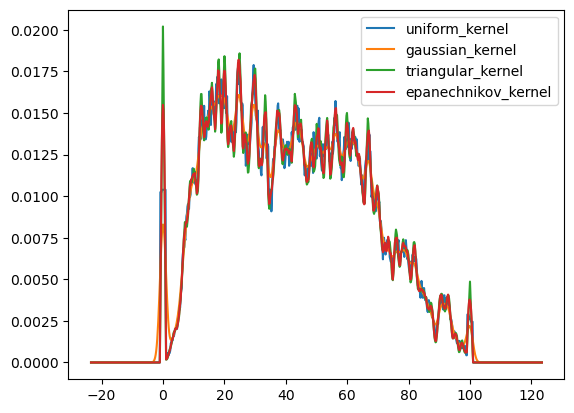

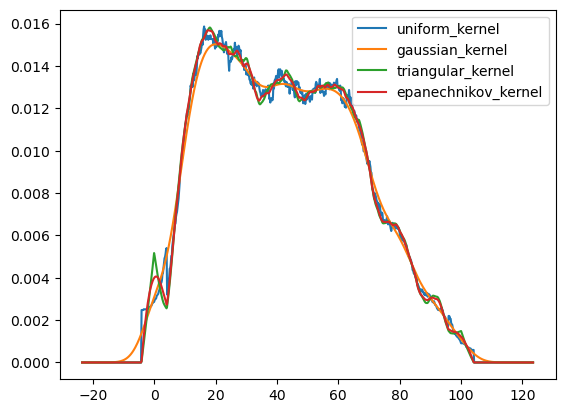

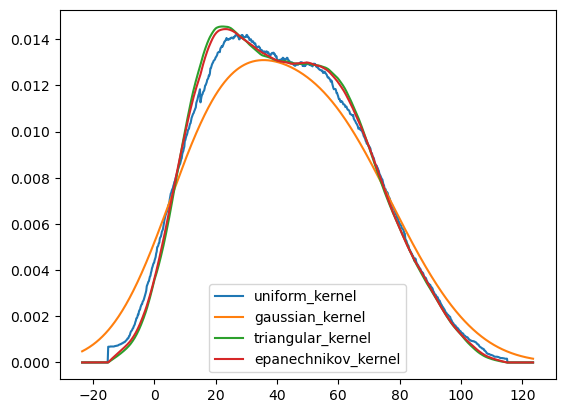

In [13]:
grad_150 = college_completion['grad_150_value'].dropna().values

h_low = 1
h_ideal = plug_in_bandwidth(grad_150) # about 4.13 for grad_150_value
h_high = 15

kde(grad_150, h_low)
kde(grad_150, h_ideal)
kde(grad_150, h_high)

The above graphs use the grad_150_value column from the college_completion data set which is a measure of what percentage of students graduate within 150% of the normal amount of time. Using the plug-in bandwidth, we can see a maximum peak around 15% with 2 local peaks around 40% and 60%. The differences see with lower and higher bandwidths are fascinating (and sometimes funny). The spiky and largley unusable nature of the graphs with low bandwidth (h=1) with overfitting to the data is contrasted with the underfitting of the high bandwidth (h=15) that starts to lose a lot of the shape of the underlying data to the point to where it also really doesn't tell us much of anything.